In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import re
import openpyxl
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
############# Use the below commands to create a requirements.txt file ###########


!echo "numpy==1.23.1" >> requirements.txt
!echo "pandas==1.5.0" >> requirements.txt
!echo "matplotlib==3.7.1" >> requirements.txt
!echo "seaborn==0.12.2" >> requirements.txt
!echo "pyarrow==12.0.0" >> requirements.txt
!echo "pyspark==3.4.0" >> requirements.txt
!echo "boto3==1.26.6" >> requirements.txt
!echo "openpyxl==3.1.2" >> requirements.txt
!echo "scikit-learn==1.3.0" >> requirements.txt

# List the files in the current directory to confirm
!ls

# View the contents of the requirements.txt file
!cat requirements.txt

# Display the current directory path
!pwd


cleaned_report.xlsx  gdrive  highlighted_issues_report.xlsx  requirements.txt  sample_data
numpy==1.23.1
pandas==1.5.0
matplotlib==3.7.1
seaborn==0.12.2
pyarrow==12.0.0
pyspark==3.4.0
boto3==1.26.6
openpyxl==3.1.2
scikit-learn==1.3.0
/content


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_parquet('/content/gdrive/MyDrive/companies.parquet', engine='pyarrow')

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=78afa9c21725017c88f7ea1492bd152d8e42bec0b1f6e383ca31d450d2430305
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
#pip install pyarrow
import pyarrow as pa
import pyarrow.parquet as pq



In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("ParquetExample") \
    .getOrCreate()


In [ ]:
# Read Parquet file into a DataFrame
df = spark.read.parquet('/content/gdrive/MyDrive/companies.parquet')

AWS Pipeline to read the data 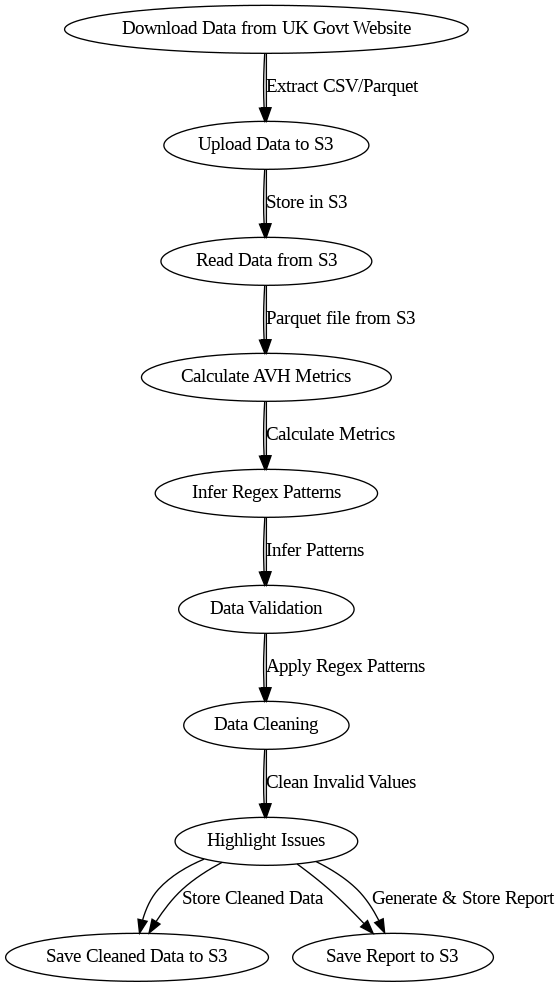

In [ ]:
df.show(10)

+--------------------+-------------+-----------------+----------------+-----------------------+-----------------------+-------------------+-----------------+------------------+-------------------+--------------------+-------------+---------------+---------------+-----------------+----------------------+------------------------+--------------------+-----------------------+------------------------+-------------------+----------------------+------------------------+----------------------------+------------------------------+--------------------------+--------------------+--------------------+--------------------+--------------------+----------------------------------+----------------------------------+--------------------+----------------------+--------------------------+----------------------+--------------------------+----------------------+--------------------------+----------------------+--------------------------+----------------------+--------------------------+---------------------

In [ ]:
!pip install boto3
!pip install boto3 pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 9.6 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import re
import boto3
from io import BytesIO
import openpyxl

In [ ]:
######### AWS Pipeline to read the data #######

In [ ]:
# Setup AWS credentials
import os
os.environ['AWS_ACCESS_KEY_ID'] = 'YOUR_AWS_ACCESS_KEY_ID'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'YOUR_AWS_SECRET_ACCESS_KEY'
os.environ['AWS_DEFAULT_REGION'] = 'YOUR_AWS_REGION'

**To read the subset of data - Comapany_Sample2.csv**

In [ ]:
# Import required libraries
import boto3
import pandas as pd
import io



# Create an S3 client
s3 = boto3.client('s3')

# Specify your bucket and file details
bucket_name = 'sagemaker-build-and-deploy-ktp'
file_key = 'Companies_data/Company_sample2.csv'  # Adjust the file name as needed

# Download the file from S3
obj = s3.get_object(Bucket=bucket_name, Key=file_key)
csv_data = obj['Body'].read().decode('utf-8')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(io.StringIO(csv_data))

# Now you can work with your dataframe
print(df.head())

                    CompanyName  CompanyNumber RegAddress.CareOf  \
0                         ! LTD        8209948               NaN   
1                        !? LTD       11399177               NaN   
2  !BIG IMPACT GRAPHICS LIMITED       11743365               NaN   
3                  !GOBERUB LTD       13404790               NaN   
4   !NFLECTION ADVISORY LIMITED       15073164               NaN   

  RegAddress.POBox     RegAddress.AddressLine1  RegAddress.AddressLine2  \
0              NaN            9 PRINCES SQUARE                HARROGATE   
1              NaN  THE STUDIO HATHERLOW HOUSE                HATHERLOW   
2              NaN              372 OLD STREET         335 ROSDEN HOUSE   
3              NaN           13 SOUTHMILL ROAD       BISHOP'S STORTFORD   
4              NaN                  52 MEADWAY                      NaN   

  RegAddress.PostTown RegAddress.County RegAddress.Country  \
0                 NaN           ENGLAND            HG1 1ND   
1             RO

**To read the Parquet file - companies.parquet**



In [ ]:
# Import required libraries
from pyspark.sql import SparkSession
import pandas as pd



# Create a Spark session
spark = SparkSession.builder \
    .appName("S3ParquetReader") \
    .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
    .getOrCreate()

# Specify your bucket and file details
bucket_name = 'sagemaker-build-and-deploy-ktp'
file_key = 'Companies_data/companies.parquet'  # Adjust the file name as needed

# Construct the S3 path
s3_path = f"s3a://{bucket_name}/{file_key}"

# Read the Parquet file from S3 using Spark
spark_df = spark.read.parquet(s3_path)

# Convert the Spark DataFrame to a pandas DataFrame

df = spark_df.toPandas()

# Now you can work with your pandas DataFrame
print(df.head())
print(df.shape)

# Stop the Spark session
spark.stop()

In [ ]:
df.shape

(5452546, 55)

In [ ]:
# Taking the first 5000 rows
sampled_df = df.head(5000)

In [ ]:
# Take a small sample of the data
#sampled_df1 = df.sample(frac=0.0005, random_state=42)

In [ ]:
sampled_df.count()

CompanyName                           5000
CompanyNumber                         5000
RegAddress_CareOf                     5000
RegAddress_POBox                      5000
RegAddress_AddressLine1               5000
RegAddress_AddressLine2               5000
RegAddress_PostTown                   5000
RegAddress_County                     5000
RegAddress_Country                    5000
RegAddress_PostCode                   5000
CompanyCategory                       5000
CompanyStatus                         5000
CountryOfOrigin                       5000
DissolutionDate                       5000
IncorporationDate                     5000
Accounts_AccountRefDay                5000
Accounts_AccountRefMonth              5000
Accounts_NextDueDate                  5000
Accounts_LastMadeUpDate               5000
Accounts_AccountCategory              5000
Returns_NextDueDate                   5000
Returns_LastMadeUpDate                5000
Mortgages_NumMortCharges              5000
Mortgages_N

In [ ]:
# Show the sampled DataFrame (optional)
sampled_df.head()

,CompanyName,CompanyNumber,RegAddress_CareOf,RegAddress_POBox,RegAddress_AddressLine1,RegAddress_AddressLine2,RegAddress_PostTown,RegAddress_County,RegAddress_Country,RegAddress_PostCode,...,PreviousName_7_CONDATE,PreviousName_7_CompanyName,PreviousName_8_CONDATE,PreviousName_8_CompanyName,PreviousName_9_CONDATE,PreviousName_9_CompanyName,PreviousName_10_CONDATE,PreviousName_10_CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,! HEAL UR TECH LTD,14413082,,,5 BRIDGE STREET,,GUILDFORD,,ENGLAND,GU1 4RY,...,,,,,,,,,25/10/2023,
1,! LTD,08209948,,,9 PRINCES SQUARE,,HARROGATE,,ENGLAND,HG1 1ND,...,,,,,,,,,25/09/2023,11/09/2022
2,!? LTD,11399177,,,THE STUDIO HATHERLOW HOUSE,HATHERLOW,ROMILEY,,UNITED KINGDOM,SK6 3DY,...,,,,,,,,,19/06/2024,05/06/2023
3,!BIG IMPACT GRAPHICS LIMITED,11743365,,,372 OLD STREET,335 ROSDEN HOUSE,LONDON,,UNITED KINGDOM,EC1V 9LT,...,,,,,,,,,10/01/2024,27/12/2022
4,!GOBERUB LTD,13404790,,,13 SOUTHMILL ROAD,,BISHOP'S STORTFORD,HERTFORDSHIRE,ENGLAND,CM23 3FR,...,,,,,,,,,29/05/2024,15/05/2023


In [ ]:
# Convert sampled DataFrame to Pandas DataFrame
#df = sampled_df1.toPandas()
#df = sampled_df

# **Exploratory Data Analysis**

# **The data is be from a business registry or database in the United Kingdom.**
# It provides essential information about the company's registration, financial status, and activities.

# Link to the official GitHub page : https://github.com/companieshouse/api-enumerations/tree/master

# **Company Details:**

**Company Name:** "HEAL UR TECH LTD"

**Company Number:** '14413082'

**Company Status:** Active

**Incorporation Date:** 12/10/2022

**Country of Origin:** United Kingdom

**Company Category:** PRI/LTD BY GUAR/NSC (Private, limited by guarantee, no share capital)

**Address Information:**
The company is located at "5 BRIDGE STREET", "GUILDFORD", "ENGLAND", "GU1 4RY".

**Financial Information:**
No accounts have been filed ('Accounts_AccountCategory': 'NO ACCOUNTS FILED').
The next due date for accounts is '12/07/2024'.
The next due date for returns is '09/11/2023'.

**SIC Codes (Standard Industrial Classification):**
'33140 - Repair of electrical equipment'
'47421 - Retail sale of mobile telephones' **bold text**

**Other Information:**
There are no mortgages associated with the company.
There is no dissolution date specified.
The next due date for the confirmation statement is '25/10/2023'.

**URI:**
'http://business.data.gov.uk/id/company/14413082' - This might be a unique identifier or a link to the company's record.









In [ ]:
df.head()

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,! LTD,8209948,NaN,NaN,9 PRINCES SQUARE,HARROGATE,NaN,ENGLAND,HG1 1ND,Private Limited Company,...,NaN,NaN,25/09/2024,11/09/2023,NaN,NaN,NaN,NaN,NaN,NaN
1,!? LTD,11399177,NaN,NaN,THE STUDIO HATHERLOW HOUSE,HATHERLOW,ROMILEY,NaN,UNITED KINGDOM,SK6 3DY,...,NaN,19/06/2024,05/06/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,!BIG IMPACT GRAPHICS LIMITED,11743365,NaN,NaN,372 OLD STREET,335 ROSDEN HOUSE,LONDON,NaN,UNITED KINGDOM,EC1V 9LT,...,NaN,NaN,NaN,NaN,29/12/2024,15/12/2023,NaN,NaN,NaN,NaN
3,!GOBERUB LTD,13404790,NaN,NaN,13 SOUTHMILL ROAD,BISHOP'S STORTFORD,HERTFORDSHIRE,ENGLAND,CM23 3FR,Private Limited Company,...,NaN,NaN,29/05/2024,15/05/2023,NaN,NaN,NaN,NaN,NaN,NaN
4,!NFLECTION ADVISORY LIMITED,15073164,NaN,NaN,52 MEADWAY,NaN,BARNET,NaN,UNITED KINGDOM,EN5 5LB,...,NaN,28/08/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = sampled_df

In [ ]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (5000, 55)


In [ ]:
print("\nColumn names:", df.columns)


Column names: Index(['CompanyName', 'CompanyNumber', 'RegAddress_CareOf', 'RegAddress_POBox',
       'RegAddress_AddressLine1', 'RegAddress_AddressLine2',
       'RegAddress_PostTown', 'RegAddress_County', 'RegAddress_Country',
       'RegAddress_PostCode', 'CompanyCategory', 'CompanyStatus',
       'CountryOfOrigin', 'DissolutionDate', 'IncorporationDate',
       'Accounts_AccountRefDay', 'Accounts_AccountRefMonth',
       'Accounts_NextDueDate', 'Accounts_LastMadeUpDate',
       'Accounts_AccountCategory', 'Returns_NextDueDate',
       'Returns_LastMadeUpDate', 'Mortgages_NumMortCharges',
       'Mortgages_NumMortOutstanding', 'Mortgages_NumMortPartSatisfied',
       'Mortgages_NumMortSatisfied', 'SICCode_SicText_1', 'SICCode_SicText_2',
       'SICCode_SicText_3', 'SICCode_SicText_4',
       'LimitedPartnerships_NumGenPartners',
       'LimitedPartnerships_NumLimPartners', 'URI', 'PreviousName_1_CONDATE',
       'PreviousName_1_CompanyName', 'PreviousName_2_CONDATE',
       'Previo

In [ ]:
print("\nData types of columns:\n\n", df.dtypes)


Data types of columns:

 CompanyName                           object
CompanyNumber                         object
RegAddress_CareOf                     object
RegAddress_POBox                      object
RegAddress_AddressLine1               object
RegAddress_AddressLine2               object
RegAddress_PostTown                   object
RegAddress_County                     object
RegAddress_Country                    object
RegAddress_PostCode                   object
CompanyCategory                       object
CompanyStatus                         object
CountryOfOrigin                       object
DissolutionDate                       object
IncorporationDate                     object
Accounts_AccountRefDay                object
Accounts_AccountRefMonth              object
Accounts_NextDueDate                  object
Accounts_LastMadeUpDate               object
Accounts_AccountCategory              object
Returns_NextDueDate                   object
Returns_LastMadeUpDate       

In [ ]:
# Perform data profiling to identify patterns and anomalies
# Example: Calculate summary statistics
summary_stats = df.describe()
print(summary_stats)

       Mortgages_NumMortCharges  Mortgages_NumMortOutstanding  \
count               5000.000000                   5000.000000   
mean                   0.874200                      0.430600   
std                    3.304143                      1.499344   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                    0.000000                      0.000000   
75%                    0.000000                      0.000000   
max                  102.000000                     24.000000   

       Mortgages_NumMortPartSatisfied  Mortgages_NumMortSatisfied  \
count                     5000.000000                 5000.000000   
mean                         0.000800                    0.440600   
std                          0.034635                    2.575228   
min                          0.000000                    0.000000   
25%                          0.000000                    0.000000   


In [ ]:
# Check for missing values including empty strings
print("\nMissing values (including empty strings):\n", df.apply(lambda x: x.isna().sum() + (x == '').sum()))


Missing values (including empty strings):
 CompanyName                              0
CompanyNumber                            0
RegAddress_CareOf                     4924
RegAddress_POBox                      4983
RegAddress_AddressLine1                 39
RegAddress_AddressLine2               1740
RegAddress_PostTown                    206
RegAddress_County                     3382
RegAddress_Country                    1875
RegAddress_PostCode                    101
CompanyCategory                          0
CompanyStatus                            0
CountryOfOrigin                          0
DissolutionDate                       5000
IncorporationDate                        0
Accounts_AccountRefDay                  92
Accounts_AccountRefMonth                92
Accounts_NextDueDate                   134
Accounts_LastMadeUpDate                984
Accounts_AccountCategory                 0
Returns_NextDueDate                    219
Returns_LastMadeUpDate                2429
Mortgages_

In [ ]:
# Print the count of unique values in each column
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"Column '{column}' has {unique_count} unique value(s).")


Column 'CompanyName' has 5000 unique value(s).
Column 'CompanyNumber' has 5000 unique value(s).
Column 'RegAddress_CareOf' has 70 unique value(s).
Column 'RegAddress_POBox' has 7 unique value(s).
Column 'RegAddress_AddressLine1' has 4162 unique value(s).
Column 'RegAddress_AddressLine2' has 2442 unique value(s).
Column 'RegAddress_PostTown' has 1050 unique value(s).
Column 'RegAddress_County' has 208 unique value(s).
Column 'RegAddress_Country' has 34 unique value(s).
Column 'RegAddress_PostCode' has 3975 unique value(s).
Column 'CompanyCategory' has 15 unique value(s).
Column 'CompanyStatus' has 8 unique value(s).
Column 'CountryOfOrigin' has 29 unique value(s).
Column 'DissolutionDate' has 1 unique value(s).
Column 'IncorporationDate' has 3679 unique value(s).
Column 'Accounts_AccountRefDay' has 27 unique value(s).
Column 'Accounts_AccountRefMonth' has 13 unique value(s).
Column 'Accounts_NextDueDate' has 846 unique value(s).
Column 'Accounts_LastMadeUpDate' has 433 unique value(s).


In [ ]:
# Function to count empty values in each column
def count_empty_values(df):
    empty_counts = {}
    for column in df.columns:
        # Counting both empty strings and None values
        empty_count = df[column].apply(lambda x: x == '' or pd.isna(x)).sum()
        empty_counts[column] = empty_count
    return empty_counts

# Get the count of empty values for each column
empty_counts = count_empty_values(df)

# Display the results
print(empty_counts)

{'CompanyName': 0, 'CompanyNumber': 0, 'RegAddress_CareOf': 4924, 'RegAddress_POBox': 4983, 'RegAddress_AddressLine1': 39, 'RegAddress_AddressLine2': 1740, 'RegAddress_PostTown': 206, 'RegAddress_County': 3382, 'RegAddress_Country': 1875, 'RegAddress_PostCode': 101, 'CompanyCategory': 0, 'CompanyStatus': 0, 'CountryOfOrigin': 0, 'DissolutionDate': 5000, 'IncorporationDate': 0, 'Accounts_AccountRefDay': 92, 'Accounts_AccountRefMonth': 92, 'Accounts_NextDueDate': 134, 'Accounts_LastMadeUpDate': 984, 'Accounts_AccountCategory': 0, 'Returns_NextDueDate': 219, 'Returns_LastMadeUpDate': 2429, 'Mortgages_NumMortCharges': 0, 'Mortgages_NumMortOutstanding': 0, 'Mortgages_NumMortPartSatisfied': 0, 'Mortgages_NumMortSatisfied': 0, 'SICCode_SicText_1': 0, 'SICCode_SicText_2': 4428, 'SICCode_SicText_3': 4796, 'SICCode_SicText_4': 4899, 'LimitedPartnerships_NumGenPartners': 0, 'LimitedPartnerships_NumLimPartners': 0, 'URI': 0, 'PreviousName_1_CONDATE': 3840, 'PreviousName_1_CompanyName': 3840, 'Prev

In [ ]:
# Specify the column for which you want to print unique values
column_name = 'RegAddress_CareOf'

# Print all unique values of the specified column
unique_values = df[column_name].unique()
print(f"Unique values of '{column_name}':")
for value in unique_values:
    print(value)

Unique values of 'RegAddress_CareOf':

DBL ACCOUNTANTS
MARTIN AITKEN & CO
BLINKHORNS
35 AVENUE ROAD
VICTORIA CARPETS LIMITED
ANDERSON STRATHERN LLP
CK
ELPIZO CHARTERED ACCOUNTANTS
KIRAN GUPTA
BAKER TILLY
MAZARS LLP
C/O TENON RECOVERY
GRANT THORNTON UK LLP
60317
BIGBIES TRAYNOR
MR STEVEN CHADWICK
ERNST & YOUNG LLP
BEGBIES TRAYNOR
KPMG LLP
C/O
BDO LLP
DELOITTE LLP
ABACUS 369 LTD
C/O MERCER & HOLE
ZOLFO COOPER
WOOD PAGE ALLEN LTD
KD ASSOCIATES
CARE OF: UNIT 6
JANET MORGAN OF SMITH COOPER
NIGEL WOODS
MORRIS & YOUNG, CA
C/O PHILLIPS AND SOUTHERN LTD
CIVVALS LIMITED
1 BUCKLAND CRESCENT RTM DIRECTORS
C/O M.PATEL
CENTRO PLC
FIFIELD GLYN LTD
OAKLEYS ACCOUNTANTS
CHF
NEIL STATHAM
MAX FRASER
1 OFFICE EQUIPMENT LTD
ALPHA HOUSING SERVICES LTD
1 SION HILL LTD
CATHARINE SOWERBY
MARK SHEEN
ANDREW SMITH
ADAM CHURCH LIMITED
1,2 AND 4 MARCUS TERRACE RESIDENTS ASSOCIATION
INSIGHT STRATEGIC ASSOCIATES
EATON ACTON ACCOUNTANTS
AJAY KANTILAL SHAH
SEM 1ST FLOOR COMPTON HOUSE
JOANNE PENROSE
STUART SMITH (DERBY) 

In [ ]:
miss = df['RegAddress_CareOf'].isna().sum() + (df['RegAddress_CareOf'].astype(str).str.strip() == '').sum()
print(miss)

4924


In [ ]:
# Count the number of values in the specified column
value_counts = df['RegAddress_CareOf'].value_counts()

#print(f"Number of values in 'RegAddress_CareOf':")
print(value_counts)

RegAddress_CareOf
                                 4924
OAKLEYS ACCOUNTANTS                 6
BAKER TILLY                         2
C/O                                 2
NEIL STATHAM                        1
                                 ... 
NIGEL WOODS                         1
MORRIS & YOUNG, CA                  1
C/O PHILLIPS AND SOUTHERN LTD       1
CIVVALS LIMITED                     1
CHARLES WHITE LIMITED               1
Name: count, Length: 70, dtype: int64


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Mortgages_NumMortCharges', 'Mortgages_NumMortOutstanding',
       'Mortgages_NumMortPartSatisfied', 'Mortgages_NumMortSatisfied',
       'LimitedPartnerships_NumGenPartners',
       'LimitedPartnerships_NumLimPartners'],
      dtype='object')


In [ ]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:\n", df.describe())


Summary statistics of numerical columns:
        Mortgages_NumMortCharges  Mortgages_NumMortOutstanding  \
count               5000.000000                   5000.000000   
mean                   0.874200                      0.430600   
std                    3.304143                      1.499344   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                    0.000000                      0.000000   
75%                    0.000000                      0.000000   
max                  102.000000                     24.000000   

       Mortgages_NumMortPartSatisfied  Mortgages_NumMortSatisfied  \
count                     5000.000000                 5000.000000   
mean                         0.000800                    0.440600   
std                          0.034635                    2.575228   
min                          0.000000                    0.000000   
25%                       

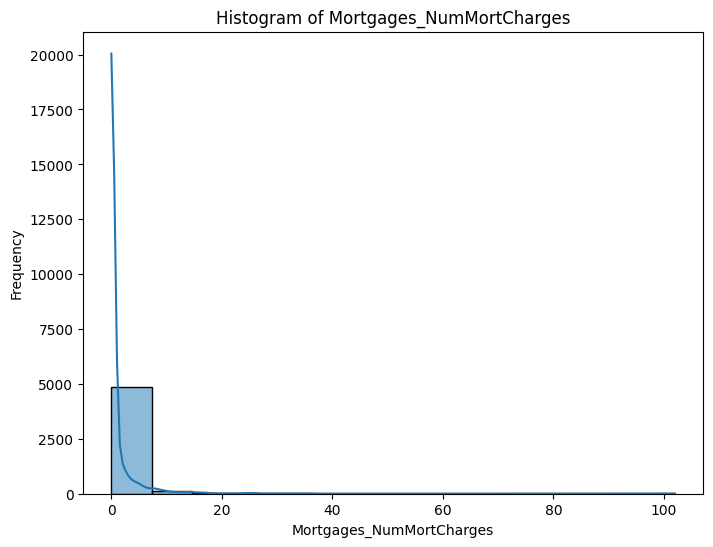

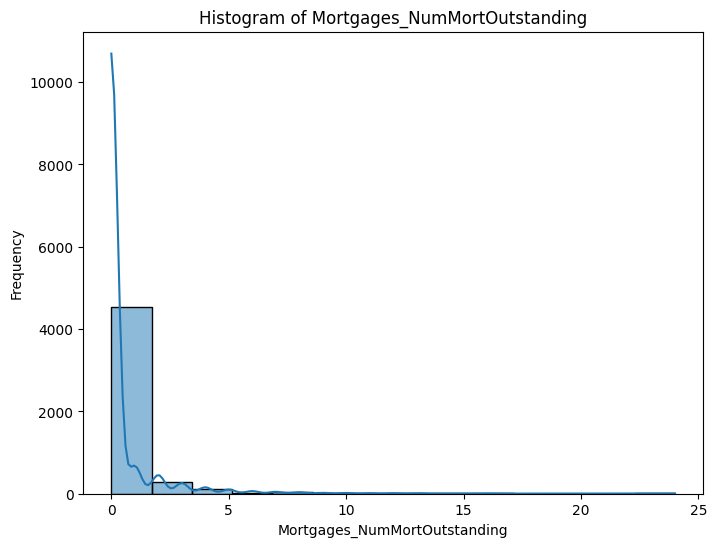

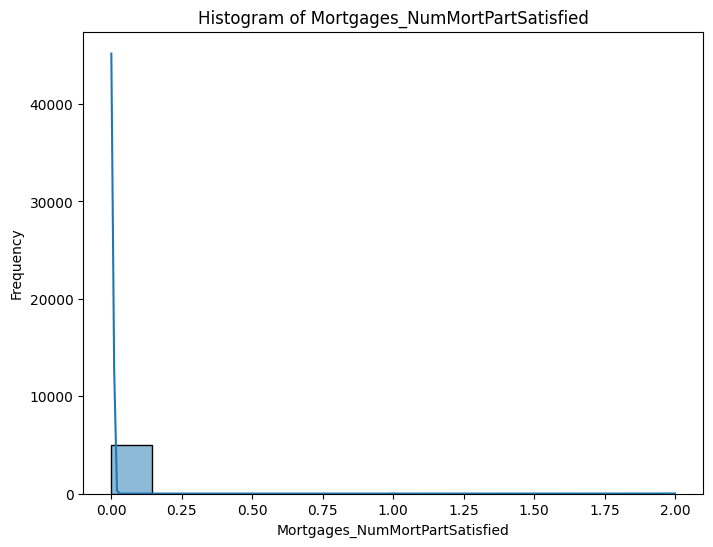

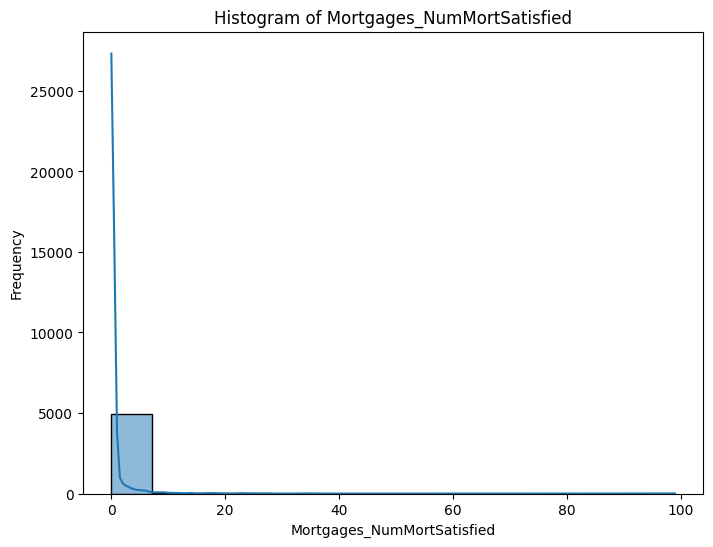

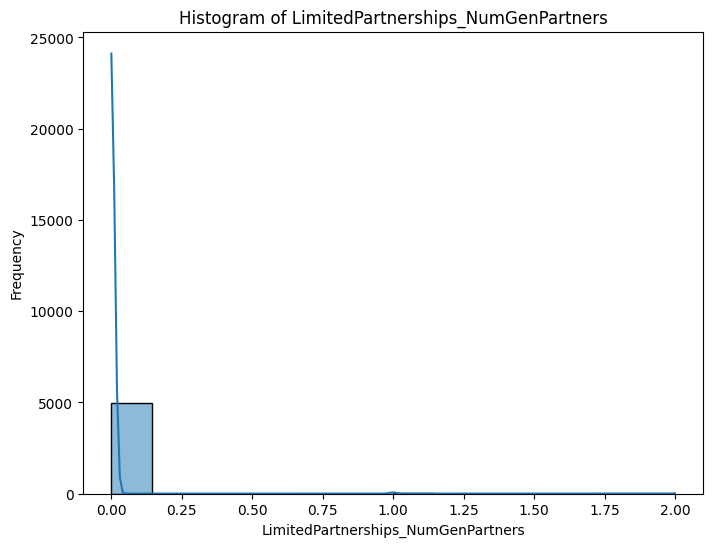

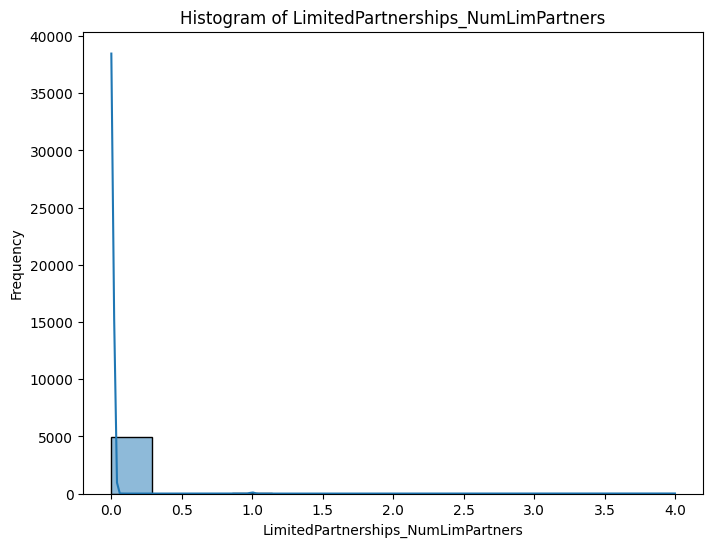

In [ ]:
# Data Visualization
# Histogram of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


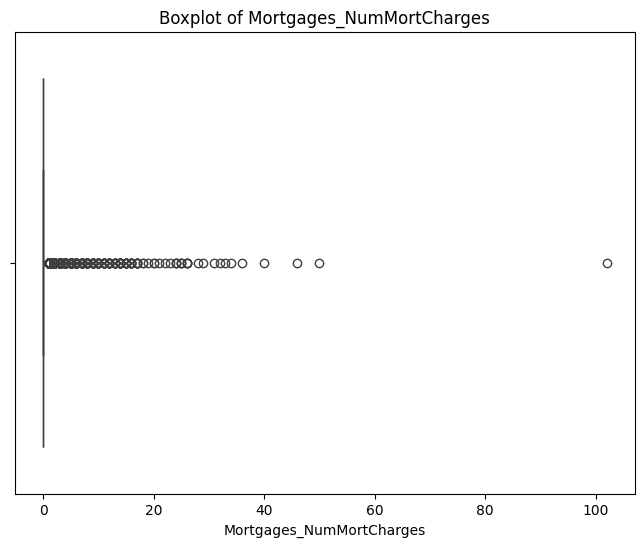

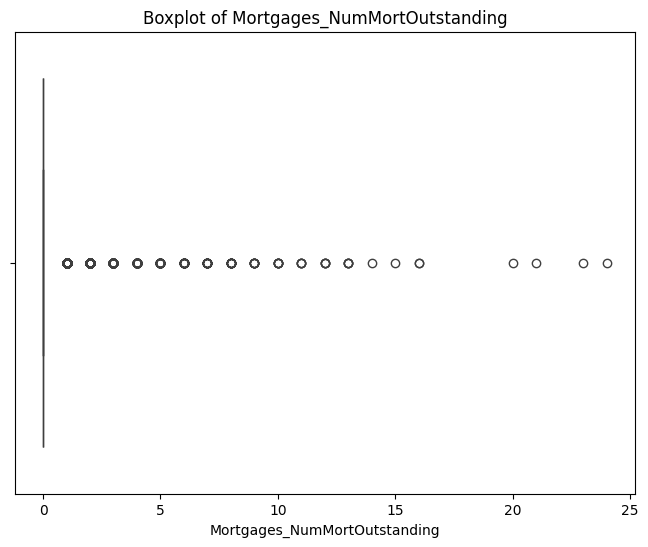

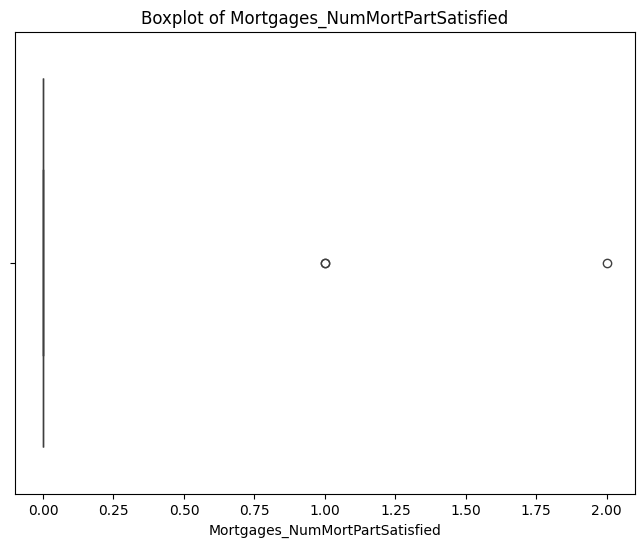

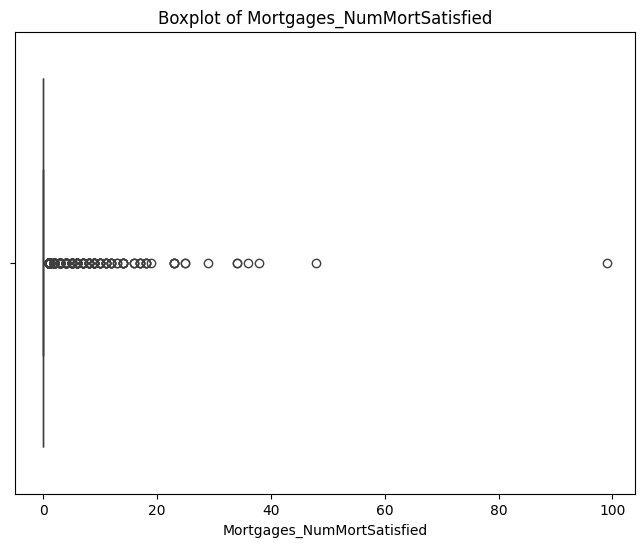

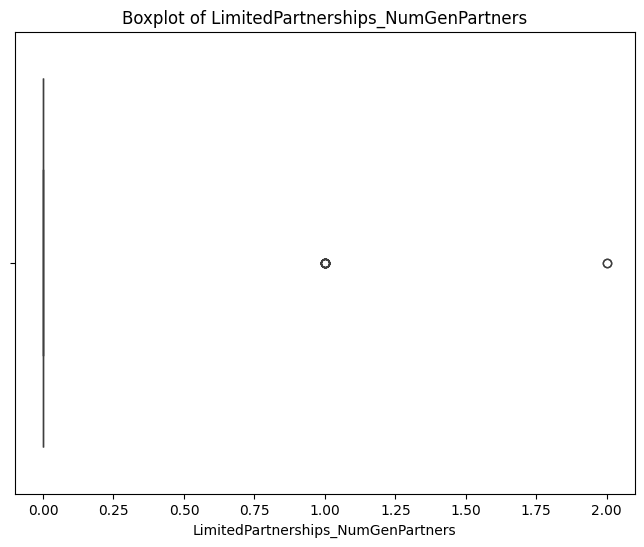

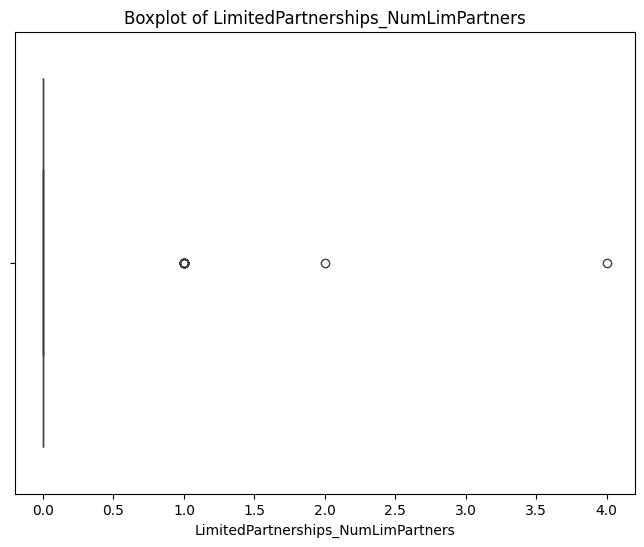

In [ ]:
# Boxplot of numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


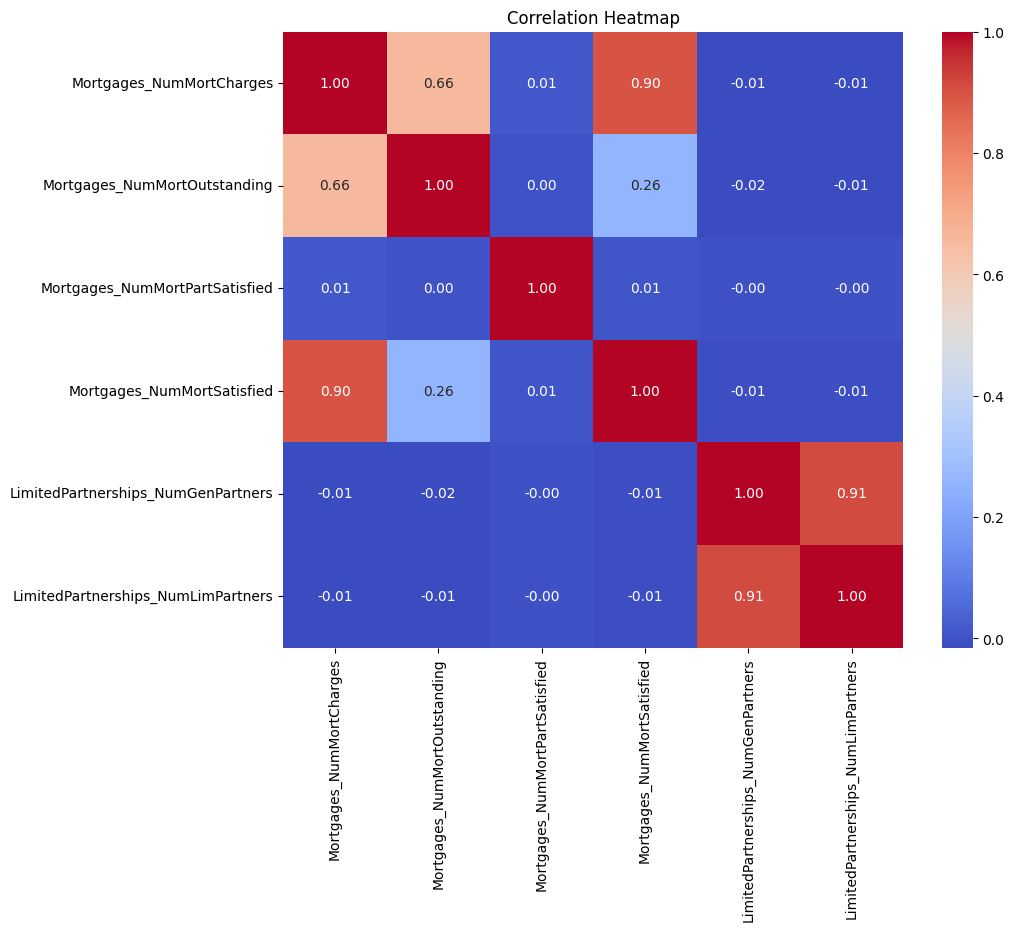

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Select string columns
string_columns = df.select_dtypes(include=['object']).columns
print(string_columns)


Index(['CompanyName', 'CompanyNumber', 'RegAddress_CareOf', 'RegAddress_POBox',
       'RegAddress_AddressLine1', 'RegAddress_AddressLine2',
       'RegAddress_PostTown', 'RegAddress_County', 'RegAddress_Country',
       'RegAddress_PostCode', 'CompanyCategory', 'CompanyStatus',
       'CountryOfOrigin', 'DissolutionDate', 'IncorporationDate',
       'Accounts_AccountRefDay', 'Accounts_AccountRefMonth',
       'Accounts_NextDueDate', 'Accounts_LastMadeUpDate',
       'Accounts_AccountCategory', 'Returns_NextDueDate',
       'Returns_LastMadeUpDate', 'SICCode_SicText_1', 'SICCode_SicText_2',
       'SICCode_SicText_3', 'SICCode_SicText_4', 'URI',
       'PreviousName_1_CONDATE', 'PreviousName_1_CompanyName',
       'PreviousName_2_CONDATE', 'PreviousName_2_CompanyName',
       'PreviousName_3_CONDATE', 'PreviousName_3_CompanyName',
       'PreviousName_4_CONDATE', 'PreviousName_4_CompanyName',
       'PreviousName_5_CONDATE', 'PreviousName_5_CompanyName',
       'PreviousName_6_CONDATE'

In [ ]:
# Check for missing values and empty strings
string_columns = df.select_dtypes(include=['object']).columns
missing_or_empty = df[string_columns].apply(lambda x: x.isnull() | (x == ''))

# Count the number of missing or empty values per column
missing_or_empty_counts = missing_or_empty.sum()
print("Missing or empty values:\n", missing_or_empty_counts)

Missing or empty values:
 CompanyName                       0
CompanyNumber                     0
RegAddress_CareOf              4924
RegAddress_POBox               4983
RegAddress_AddressLine1          39
RegAddress_AddressLine2        1740
RegAddress_PostTown             206
RegAddress_County              3382
RegAddress_Country             1875
RegAddress_PostCode             101
CompanyCategory                   0
CompanyStatus                     0
CountryOfOrigin                   0
DissolutionDate                5000
IncorporationDate                 0
Accounts_AccountRefDay           92
Accounts_AccountRefMonth         92
Accounts_NextDueDate            134
Accounts_LastMadeUpDate         984
Accounts_AccountCategory          0
Returns_NextDueDate             219
Returns_LastMadeUpDate         2429
SICCode_SicText_1                 0
SICCode_SicText_2              4428
SICCode_SicText_3              4796
SICCode_SicText_4              4899
URI                               0
Pr

In [ ]:
# Check for leading and trailing whitespace
leading_whitespace = df[string_columns].apply(lambda x: x.str.startswith(' ')).any()
trailing_whitespace = df[string_columns].apply(lambda x: x.str.endswith(' ')).any()
print("Leading whitespace:\n", leading_whitespace)
print("Trailing whitespace:\n", trailing_whitespace)

Leading whitespace:
 CompanyName                    False
CompanyNumber                  False
RegAddress_CareOf              False
RegAddress_POBox               False
RegAddress_AddressLine1        False
RegAddress_AddressLine2        False
RegAddress_PostTown             True
RegAddress_County              False
RegAddress_Country             False
RegAddress_PostCode            False
CompanyCategory                False
CompanyStatus                  False
CountryOfOrigin                False
DissolutionDate                False
IncorporationDate              False
Accounts_AccountRefDay         False
Accounts_AccountRefMonth       False
Accounts_NextDueDate           False
Accounts_LastMadeUpDate        False
Accounts_AccountCategory       False
Returns_NextDueDate            False
Returns_LastMadeUpDate         False
SICCode_SicText_1              False
SICCode_SicText_2              False
SICCode_SicText_3              False
SICCode_SicText_4              False
URI              

In [ ]:
################# Exploratory Data Analysis report

In [ ]:
# 1. Missing Values
missing_or_empty_counts = missing_or_empty.sum()

In [ ]:
# 2. Data Consistency
# For example, checking unique values for 'CompanyStatus'
company_status_consistency = df['CompanyStatus'].unique()

In [ ]:
# 3. Format Consistency
# Assuming date columns are in 'DD/MM/YYYY' format
date_columns = ['IncorporationDate', 'Accounts_NextDueDate', 'Returns_NextDueDate', 'ConfStmtNextDueDate', 'ConfStmtLastMadeUpDate']
for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')

<ipython-input-67-2326c2595d45>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[column] = pd.to_datetime(df[column], errors='coerce')


In [ ]:
# 4. Data Accuracy
# No specific code provided, as accuracy checks may require domain-specific validation or external data sources.


In [ ]:
# 5. Domain-specific Validation
# For example, checking if SIC codes are valid
valid_sic_codes = ['33140', '47421']  # Example valid codes ------ download SIC codes---
sic_code_validation = df[['SICCode_SicText_1', 'SICCode_SicText_2']].apply(lambda x: all(code in valid_sic_codes for code in x), axis=1)


In [ ]:
# 6. Data Completeness
# No specific code provided, as completeness checks may involve checking if all necessary fields are present.


In [ ]:
# 7. Data Integrity
# No specific code provided, as integrity checks may involve comparing data between different fields.


In [ ]:
# 8. Data Timeliness
# No specific code provided, as timeliness checks may involve comparing dates against the current date or a specified threshold.


In [ ]:
# 9. Data Duplication
duplicate_rows = df[df.duplicated()]


In [ ]:
print(duplicate_rows)

Empty DataFrame
Columns: [CompanyName, CompanyNumber, RegAddress_CareOf, RegAddress_POBox, RegAddress_AddressLine1, RegAddress_AddressLine2, RegAddress_PostTown, RegAddress_County, RegAddress_Country, RegAddress_PostCode, CompanyCategory, CompanyStatus, CountryOfOrigin, DissolutionDate, IncorporationDate, Accounts_AccountRefDay, Accounts_AccountRefMonth, Accounts_NextDueDate, Accounts_LastMadeUpDate, Accounts_AccountCategory, Returns_NextDueDate, Returns_LastMadeUpDate, Mortgages_NumMortCharges, Mortgages_NumMortOutstanding, Mortgages_NumMortPartSatisfied, Mortgages_NumMortSatisfied, SICCode_SicText_1, SICCode_SicText_2, SICCode_SicText_3, SICCode_SicText_4, LimitedPartnerships_NumGenPartners, LimitedPartnerships_NumLimPartners, URI, PreviousName_1_CONDATE, PreviousName_1_CompanyName, PreviousName_2_CONDATE, PreviousName_2_CompanyName, PreviousName_3_CONDATE, PreviousName_3_CompanyName, PreviousName_4_CONDATE, PreviousName_4_CompanyName, PreviousName_5_CONDATE, PreviousName_5_CompanyNa

In [ ]:
# 10. Count duplicates for each column
duplicate_counts = df[df.duplicated()].apply(lambda x: x.value_counts()).T.stack()

# Filter out columns with duplicates and count of duplicates
duplicate_columns = duplicate_counts[duplicate_counts > 0]

# Display column names with duplicates and count of duplicates
print("Column Names with Duplicates and Count of Duplicates:")
print(duplicate_columns)

Column Names with Duplicates and Count of Duplicates:
Series([], dtype: float64)


In [ ]:
# 11. Data Source Reliability
# No specific code provided, as source reliability checks may involve verifying the credibility of the data source URI.


In [ ]:
# Displaying the results
print("1. Missing or Empty Values:")
print(missing_or_empty_counts)
print("\n2. Data Consistency (CompanyStatus):")
print(company_status_consistency)
print("\n3. Format Consistency (Date Columns):")
print(df[date_columns].dtypes)
print("\n5. Domain-specific Validation (SIC Code Validation):")
print(sic_code_validation)
print("\n9. Data Duplication:")
print(duplicate_rows)
# Display column names with duplicates and count of duplicates
print("\n10.Column Names with Duplicates and Count of Duplicates:")
print(duplicate_columns)

1. Missing or Empty Values:
CompanyName                       0
CompanyNumber                     0
RegAddress_CareOf              4924
RegAddress_POBox               4983
RegAddress_AddressLine1          39
RegAddress_AddressLine2        1740
RegAddress_PostTown             206
RegAddress_County              3382
RegAddress_Country             1875
RegAddress_PostCode             101
CompanyCategory                   0
CompanyStatus                     0
CountryOfOrigin                   0
DissolutionDate                5000
IncorporationDate                 0
Accounts_AccountRefDay           92
Accounts_AccountRefMonth         92
Accounts_NextDueDate            134
Accounts_LastMadeUpDate         984
Accounts_AccountCategory          0
Returns_NextDueDate             219
Returns_LastMadeUpDate         2429
SICCode_SicText_1                 0
SICCode_SicText_2              4428
SICCode_SicText_3              4796
SICCode_SicText_4              4899
URI                               0


# **Regex Based Pattern Matching**

In [ ]:
df = pd.read_csv('Company_sample2.csv')

In [ ]:
data = df

In [ ]:
data.shape

(9999, 55)

In [ ]:
import pandas as pd
import re

# Function to infer regex patterns for a given series
def infer_regex_pattern(series):
    series = series.dropna().astype(str)
    patterns = set()
    for value in series:
        if re.match(r'^[A-Z]{1,2}\d[A-Z\d]? ?\d[A-Z]{2}$', value):
            patterns.add(r'[A-Z]{1,2}\d[A-Z\d]? \d[A-Z]{2}')
        elif re.match(r'^\d{2}/\d{2}/\d{4}$', value):
            patterns.add(r'\d{2}/\d{2}/\d{4}')
        elif re.match(r'^http://business\.data\.gov\.uk/id/company/[A-Z0-9]+$', value):
            patterns.add(r'http://business\.data\.gov\.uk/id/company/[A-Z0-9]+')
        elif re.match(r'^[A-Za-z\s,]+$', value):
            patterns.add(r'[A-Za-z\s,]+')
        elif re.match(r'^[A-Za-z\s\-\/]+(?: [A-Za-z\s\-\/]+)*$', value):
            patterns.add(r'[A-Za-z\s\-\/]+(?: [A-Za-z\s\-\/]+)*')
        elif re.match(r'^[A-Za-z0-9/\s\-,()\'"]+$', value):  # Corrected this line
            patterns.add(r'[A-Za-z0-9/\s\-,()\'"]+')
        elif re.match(r'^[A-Za-z0-9\s]+$', value):
            patterns.add(r'[A-Za-z0-9\s]+')
        elif re.match(r'^[^A-Za-z0-9\s\-()]+$', value):
            patterns.add(r'[^A-Za-z0-9\s\-()]+')
        else:
            patterns.add(r'.*')  # General pattern if none of the above match
    return patterns

# Function to generate regex patterns for all columns in a dataset
def generate_regex_patterns(data):
    regex_patterns = {}
    for col in data.columns:
        patterns = infer_regex_pattern(data[col])
        regex_patterns[col] = re.compile('|'.join(patterns))
    return regex_patterns

# Load the data
# data = pd.read_csv('Company_sample2.csv')  # Change this to your dataset path
# Generate regex patterns for the dataset
regex_patterns = generate_regex_patterns(data)

# Print the regex patterns in the desired format
print("# Define regex patterns for each column (derived from the data)")
print("regex_patterns = {")
for col, pattern in regex_patterns.items():
    print(f'    "{col}": re.compile(r"{pattern.pattern}"),')
print("}")


# Define regex patterns for each column (derived from the data)
regex_patterns = {
    "CompanyName": re.compile(r".*|[A-Za-z0-9/\s\-,()\'"]+|[A-Za-z\s\-\/]+(?: [A-Za-z\s\-\/]+)*|[A-Za-z\s,]+"),
    " CompanyNumber": re.compile(r"[A-Za-z0-9/\s\-,()\'"]+"),
    "RegAddress.CareOf": re.compile(r"[A-Za-z\s,]+|.*|[A-Za-z0-9/\s\-,()\'"]+|[A-Za-z\s\-\/]+(?: [A-Za-z\s\-\/]+)*"),
    "RegAddress.POBox": re.compile(r"[A-Za-z0-9/\s\-,()\'"]+|.*|[A-Za-z\s,]+|[A-Z]{1,2}\d[A-Z\d]? \d[A-Z]{2}"),
    "RegAddress.AddressLine1": re.compile(r"[A-Za-z0-9/\s\-,()\'"]+|.*|[A-Za-z\s,]+|[A-Za-z\s\-\/]+(?: [A-Za-z\s\-\/]+)*"),
    " RegAddress.AddressLine2": re.compile(r"[A-Za-z\s,]+|[A-Za-z0-9/\s\-,()\'"]+|.*|[A-Za-z\s\-\/]+(?: [A-Za-z\s\-\/]+)*|[A-Z]{1,2}\d[A-Z\d]? \d[A-Z]{2}"),
    "RegAddress.PostTown": re.compile(r"[A-Za-z\s,]+|[A-Za-z0-9/\s\-,()\'"]+|.*|[A-Za-z\s\-\/]+(?: [A-Za-z\s\-\/]+)*|[A-Z]{1,2}\d[A-Z\d]? \d[A-Z]{2}"),
    "RegAddress.County": re.compile(r"[A-Za-z\s,]+|[A-Za-z0-9/\s\-,()\'"]+|.*|[A

In [ ]:
##################### Regex for Comapnies House data ##############

import re

# Define regex patterns for each column (derived from the data)
import re

# Define regex patterns for each column (derived from the data)
regex_patterns = {
    "CompanyName": re.compile(r"^[^\s][A-Za-z0-9\s\-()]*[^\s]$"),
    "CompanyNumber": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "RegAddress.CareOf": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "RegAddress.POBox": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "RegAddress.AddressLine1": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "RegAddress.AddressLine2": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "RegAddress.PostTown": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "RegAddress.County": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "RegAddress.Country": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "RegAddress.PostCode": re.compile(r"^[^\s][A-Z]{1,2}\d[A-Z\d]? \d[A-Z]{2}[^\s]$"),
    "CompanyCategory": re.compile(r"^[^\s][A-Za-z0-9/\s\-,()']*[^\s]$"),
    "CompanyStatus": re.compile(r"^[^\s][A-Za-z\s\-\/]+(?: [A-Za-z\s\-\/]+)*[^\s]$"),
    "CountryOfOrigin": re.compile(r"^[^\s][A-Za-z\s,]*[^\s]$"),
    "DissolutionDate": re.compile(r"^(?:[^\s]\d{2}/\d{2}/\d{4}[^\s])?$"),
    "IncorporationDate": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "Accounts.AccountRefDay": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "Accounts.AccountRefMonth": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "Accounts.NextDueDate": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "Accounts.LastMadeUpDate": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "Accounts.AccountCategory": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "Returns.NextDueDate": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "Returns.LastMadeUpDate": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "Mortgages.NumMortCharges": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "Mortgages.NumMortOutstanding": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "Mortgages.NumMortPartSatisfied": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "Mortgages.NumMortSatisfied": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "SICCode.SicText_1": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "SICCode.SicText_2": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "SICCode.SicText_3": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "SICCode.SicText_4": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "LimitedPartnerships.NumGenPartners": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "LimitedPartnerships.NumLimPartners": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "URI": re.compile(r"^http://business\.data\.gov\.uk/id/company/[A-Z0-9]+$"),
    "PreviousName_1.CONDATE": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "PreviousName_1.CompanyName": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "PreviousName_2.CONDATE": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "PreviousName_2.CompanyName": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "PreviousName_3.CONDATE": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "PreviousName_3.CompanyName": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "PreviousName_4.CONDATE": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "PreviousName_4.CompanyName": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "PreviousName_5.CONDATE": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "PreviousName_5.CompanyName": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "PreviousName_6.CONDATE": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "PreviousName_6.CompanyName": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "PreviousName_7.CONDATE": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "PreviousName_7.CompanyName": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "PreviousName_8.CONDATE": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "PreviousName_8.CompanyName": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "PreviousName_9.CONDATE": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "PreviousName_9.CompanyName": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "PreviousName_10.CONDATE": re.compile(r"^[^\s]\d{2}/\d{2}/\d{4}[^\s]$"),
    "PreviousName_10.CompanyName": re.compile(r"^[^\s][A-Za-z0-9\s]*[^\s]$"),
    "ConfStmtNextDueDate": re.compile(r"^(?:[^\s]\d{2}/\d{2}/\d{4}[^\s])?$")
}


# Clean the regex patterns keys
#regex_patterns = {k.strip(): v for k, v in regex_patterns.items()}
# "ConfStmtLastMadeUpDate": re.compile(r"^[A-Za-z0-9\s]+$") (r"[^A-Za-z0-9\s\-()]")

In [ ]:
print(regex_patterns)

{'CompanyName': re.compile('^[A-Za-z0-9\\s\\-()]+$'), 'CompanyNumber': re.compile('^[A-Za-z0-9\\s]+$'), 'RegAddress.CareOf': re.compile('^[A-Za-z0-9\\s]+$'), 'RegAddress.POBox': re.compile('^[A-Za-z0-9\\s]+$'), 'RegAddress.AddressLine1': re.compile('^[A-Za-z0-9\\s]+$'), 'RegAddress.AddressLine2': re.compile('^[A-Za-z0-9\\s]+$'), 'RegAddress.PostTown': re.compile('^[A-Za-z0-9\\s]+$'), 'RegAddress.County': re.compile('^[A-Za-z0-9\\s]+$'), 'RegAddress.Country': re.compile('^[A-Za-z0-9\\s]+$'), 'RegAddress.PostCode': re.compile('^[A-Z]{1,2}\\d[A-Z\\d]? \\d[A-Z]{2}$'), 'CompanyCategory': re.compile("^[A-Za-z0-9/\\s\\-,()']+$"), 'CompanyStatus': re.compile('^[A-Za-z\\s\\-\\/]+(?: [A-Za-z\\s\\-\\/]+)*$'), 'CountryOfOrigin': re.compile('^[A-Za-z\\s,]+$'), 'DissolutionDate': re.compile('^(?:\\d{2}/\\d{2}/\\d{4})?$'), 'IncorporationDate': re.compile('^\\d{2}/\\d{2}/\\d{4}$'), 'Accounts.AccountRefDay': re.compile('^[A-Za-z0-9\\s]+$'), 'Accounts.AccountRefMonth': re.compile('^[A-Za-z0-9\\s]+$'), '

In [ ]:
import pandas as pd
import re



# Function to validate a single value against a regex pattern
def validate_value(value, pattern):
    if pd.isna(value):
        return True
    return bool(pattern.match(str(value)))

# Function to validate the entire DataFrame
def validate_dataframe(df, patterns):
    invalid_columns = set()
    for col, pattern in patterns.items():
        if col in df.columns:
            invalid_rows = df[~df[col].apply(lambda x: validate_value(x, pattern))]
            if not invalid_rows.empty:
                invalid_columns.add(col)
    return invalid_columns

# Validate the DataFrame
invalid_columns = validate_dataframe(data, regex_patterns)

# Print columns with invalid entries
if invalid_columns:
    print("Columns with invalid entries:")
    for col in invalid_columns:
        print(col)
else:
    print("All entries are valid.")

Columns with invalid entries:
RegAddress.PostCode
DissolutionDate
CountryOfOrigin
Accounts.AccountRefMonth
PreviousName_8.CONDATE
SICCode.SicText_2
Returns.NextDueDate
SICCode.SicText_1
PreviousName_3.CONDATE
PreviousName_9.CONDATE
Accounts.LastMadeUpDate
Mortgages.NumMortSatisfied
PreviousName_1.CONDATE
SICCode.SicText_3
PreviousName_4.CONDATE
ConfStmtNextDueDate
URI
PreviousName_6.CONDATE
PreviousName_7.CONDATE
IncorporationDate
Mortgages.NumMortCharges
RegAddress.POBox
SICCode.SicText_4
LimitedPartnerships.NumGenPartners
PreviousName_5.CONDATE
PreviousName_10.CONDATE
Accounts.NextDueDate
CompanyStatus
Accounts.AccountRefDay
Mortgages.NumMortOutstanding
Mortgages.NumMortPartSatisfied
RegAddress.PostTown
Returns.LastMadeUpDate
Accounts.AccountCategory


In [ ]:
import pandas as pd
import re


# Function to validate a single value against a regex pattern
def validate_value(value, pattern):
    if pd.isna(value) or value == '':
        return True
    return bool(pattern.match(str(value)))

# Function to validate the entire DataFrame
def validate_dataframe(df, patterns):
    invalid_entries = []
    for col, pattern in patterns.items():
        if col in df.columns:
            invalid_rows = df[~df[col].apply(lambda x: validate_value(x, pattern))]
            if not invalid_rows.empty:
                for idx, row in invalid_rows.iterrows():
                    invalid_entries.append((idx, col, row[col]))
    return invalid_entries

# Validate the DataFrame
invalid_entries = validate_dataframe(data, regex_patterns)

# Print invalid entries
if invalid_entries:
    print("Invalid entries found:")
    for entry in invalid_entries:
        print(f"Row {entry[0]}, Column '{entry[1]}': {entry[2]}")
else:
    print("All entries are valid.")

# Check for missing values and empty strings in string columns
string_columns = df.select_dtypes(include=['object']).columns
missing_or_empty = df[string_columns].apply(lambda x: x.isnull() | (x == ''))

# Count the number of missing or empty values per column
missing_or_empty_counts = missing_or_empty.sum()
print("\nMissing or empty values:\n", missing_or_empty_counts)

# Highlight the issues in the DataFrame for reporting
df_highlighted = df.copy()
for col in missing_or_empty:
    df_highlighted[col] = df_highlighted[col].apply(lambda x: 'MISSING' if pd.isnull(x) or x == '' else x)

print("\nDataFrame with highlighted issues:")
print(df_highlighted)





Streaming output truncated to the last 5000 lines.
Row 4279, Column 'PreviousName_8.CONDATE': 08/01/2025
Row 4280, Column 'PreviousName_8.CONDATE': 03/10/2024
Row 4281, Column 'PreviousName_8.CONDATE': 16/06/2023
Row 4282, Column 'PreviousName_8.CONDATE': 27/09/2023
Row 4284, Column 'PreviousName_8.CONDATE': 05/10/2024
Row 4285, Column 'PreviousName_8.CONDATE': 19/03/2024
Row 4286, Column 'PreviousName_8.CONDATE': 13/03/2025
Row 4287, Column 'PreviousName_8.CONDATE': 12/06/2024
Row 4288, Column 'PreviousName_8.CONDATE': 31/12/2023
Row 4290, Column 'PreviousName_8.CONDATE': 26/11/2023
Row 4292, Column 'PreviousName_8.CONDATE': 09/10/2023
Row 4294, Column 'PreviousName_8.CONDATE': 03/09/2023
Row 4295, Column 'PreviousName_8.CONDATE': 15/07/2023
Row 4296, Column 'PreviousName_8.CONDATE': 01/10/2023
Row 4297, Column 'PreviousName_8.CONDATE': 08/09/2023
Row 4298, Column 'PreviousName_8.CONDATE': 18/05/2023
Row 4299, Column 'PreviousName_8.CONDATE': 15/06/2023
Row 4300, Column 'PreviousName_

In [ ]:
pip install openpyxl


In [ ]:
data.head()

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,! LTD,8209948,NaN,NaN,9 PRINCES SQUARE,HARROGATE,NaN,ENGLAND,HG1 1ND,Private Limited Company,...,NaN,NaN,25/09/2024,11/09/2023,NaN,NaN,NaN,NaN,NaN,NaN
1,!? LTD,11399177,NaN,NaN,THE STUDIO HATHERLOW HOUSE,HATHERLOW,ROMILEY,NaN,UNITED KINGDOM,SK6 3DY,...,NaN,19/06/2024,05/06/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,!BIG IMPACT GRAPHICS LIMITED,11743365,NaN,NaN,372 OLD STREET,335 ROSDEN HOUSE,LONDON,NaN,UNITED KINGDOM,EC1V 9LT,...,NaN,NaN,NaN,NaN,29/12/2024,15/12/2023,NaN,NaN,NaN,NaN
3,!GOBERUB LTD,13404790,NaN,NaN,13 SOUTHMILL ROAD,BISHOP'S STORTFORD,HERTFORDSHIRE,ENGLAND,CM23 3FR,Private Limited Company,...,NaN,NaN,29/05/2024,15/05/2023,NaN,NaN,NaN,NaN,NaN,NaN
4,!NFLECTION ADVISORY LIMITED,15073164,NaN,NaN,52 MEADWAY,NaN,BARNET,NaN,UNITED KINGDOM,EN5 5LB,...,NaN,28/08/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Function to highlight the issues in the dataset and get a report of the issues

In [ ]:
import pandas as pd
import re

# Load the data
#file_path = 'path_to_your_file.csv'
df = data



# Function to validate a single value against a regex pattern
def validate_value(value, pattern):
    if pd.isna(value) or value == '':
        return True
    return bool(pattern.match(str(value)))

# Check for missing values and empty strings in string columns
string_columns = df.select_dtypes(include=['object']).columns
missing_or_empty = df[string_columns].apply(lambda x: x.isnull() | (x == ''))

# Highlight the issues in the DataFrame for reporting
df_highlighted = df.copy()

# Apply missing or empty value highlights
for col in missing_or_empty:
    df_highlighted[col] = df_highlighted[col].apply(lambda x: 'MISSING' if pd.isnull(x) or x == '' else x)

# Define a function to apply background color to cells with issues
def highlight_issues(val, col):
    if val == 'MISSING':
        color = 'yellow'
    elif col in regex_patterns and not validate_value(val, regex_patterns[col]):
        color = 'red'
    else:
        color = ''
    return f'background-color: {color}'

# Apply the highlighting
styled = df_highlighted.style.apply(lambda row: [highlight_issues(row[col], col) for col in row.index], axis=1)

# Save the highlighted data to an Excel file
styled.to_excel('highlighted_issues_report.xlsx', index=False, engine='openpyxl')

print("\nDataFrame with highlighted issues saved to 'highlighted_issues_report.xlsx'.")


<ipython-input-19-69ce1549674e>:41: CSSWarning: Unhandled color format: ''
  styled.to_excel('highlighted_issues_report.xlsx', index=False, engine='openpyxl')



DataFrame with highlighted issues saved to 'highlighted_issues_report.xlsx'.


Function to clean and produce a clean dataset

In [ ]:
import pandas as pd
import re

# Function to validate a single value against a regex pattern
def validate_value(value, pattern):
    if pd.isna(value) or value == '':
        return True
    return bool(pattern.match(str(value)))

# Function to clean values based on regex pattern
def clean_value(value, pattern):
    if pd.isna(value) or value == '':
        return value
    if validate_value(value, pattern):
        return value
    return re.sub(r'[^A-Za-z0-9\s.,-]', '', str(value))  # Remove anything not allowed by the regex pattern

# Clean the DataFrame based on regex patterns
def clean_dataframe(df, regex_patterns):
    df_cleaned = df.copy()
    for col, pattern in regex_patterns.items():
        if col in df_cleaned.columns:
            df_cleaned[col] = df_cleaned[col].apply(lambda x: clean_value(x, pattern))
    return df_cleaned

# Highlight the issues in the DataFrame for reporting
def highlight_issues(val, pattern):
    if pd.isna(val):
        color = 'yellow'  # Highlight missing values in yellow
    elif not validate_value(val, pattern):
        color = 'green'  # Highlight invalid values in green
    else:
        color = ''
    return f'background-color: {color}'

# Load the data
file_path = 'path_to_your_file.csv'
df = data



# Clean the DataFrame
df_cleaned = clean_dataframe(df, regex_patterns)

# Apply missing or empty value highlights
string_columns = df.select_dtypes(include=['object']).columns
missing_or_empty = df[string_columns].apply(lambda x: x.isnull() | (x == ''))

# Highlight the issues in the cleaned DataFrame for reporting
df_highlighted = df_cleaned.copy()
for col in missing_or_empty:
    df_highlighted[col] = df_highlighted[col].apply(lambda x: 'MISSING' if pd.isnull(x) or x == '' else x)

# Apply regex validation highlights
for col, pattern in regex_patterns.items():
    if col in df_highlighted.columns:
        df_highlighted[col] = df_highlighted[col].apply(lambda x: highlight_issues(x, pattern) if not validate_value(x, pattern) else x)

# Define a function to apply background color to cells with issues
def highlight_issues(val):
    if val == 'MISSING':
        color = 'yellow'
    elif val == 'green':
        color = 'green'
    else:
        color = ''
    return f'background-color: {color}'

# Apply the highlighting
styled_cleaned = df_highlighted.style.applymap(highlight_issues)

# Save the cleaned and highlighted data to an Excel file
styled_cleaned.to_excel('cleaned_report.xlsx', index=False, engine='openpyxl')

print("\nCleaned DataFrame with highlighted issues saved to 'cleaned_report.xlsx'.")


<ipython-input-22-de24f09cf78c>:73: CSSWarning: Unhandled color format: ''
  styled_cleaned.to_excel('cleaned_report.xlsx', index=False, engine='openpyxl')



Cleaned DataFrame with highlighted issues saved to 'cleaned_report.xlsx'.


Saving the highlighted issues report and cleaned dataset into S3 bucket under the file - Companies_Clean_report

In [ ]:
import boto3
import pandas as pd

# Create an S3 client
s3_client = boto3.client('s3')

# Your existing code for data cleaning and styling...

# Save the highlighted data to an Excel file
local_file_path = '/tmp/highlighted_issues_report.xlsx'
styled_cleaned.to_excel(local_file_path, index=False, engine='openpyxl')

# Define your bucket name and the full path for the file in S3
bucket_name = 'sagemaker-build-and-deploy-ktp'
output_file_key = 'Companies_Clean_report/highlighted_issues_report.xlsx'

# Upload the cleaned report to S3
s3_client.upload_file(local_file_path, bucket_name, output_file_key)

print(f"\nCleaned DataFrame with highlighted issues saved to '{output_file_key}' in S3 bucket '{bucket_name}'.")

<ipython-input-94-e3460901548a>:11: CSSWarning: Unhandled color format: ''
  styled_cleaned.to_excel(local_file_path, index=False, engine='openpyxl')



Cleaned DataFrame with highlighted issues saved to 'Companies_Clean_report/highlighted_issues_report.xlsx' in S3 bucket 'sagemaker-build-and-deploy-ktp'.


In [ ]:
import boto3
import pandas as pd

# Create an S3 client
s3_client = boto3.client('s3')

# Save the cleaned and highlighted data to an Excel file
local_file_path = '/tmp/cleaned_report.xlsx'
styled_cleaned.to_excel(local_file_path, index=False, engine='openpyxl')

# Define your bucket name and the full path for the file in S3
bucket_name = 'sagemaker-build-and-deploy-ktp'
output_file_key = 'Companies_Clean_report/cleaned_report.xlsx'

# Upload the cleaned report to S3
s3_client.upload_file(local_file_path, bucket_name, output_file_key)

print(f"\nCleaned DataFrame with highlighted issues saved to '{output_file_key}' in S3 bucket '{bucket_name}'.")

<ipython-input-95-da50f8b7acd1>:9: CSSWarning: Unhandled color format: ''
  styled_cleaned.to_excel(local_file_path, index=False, engine='openpyxl')



Cleaned DataFrame with highlighted issues saved to 'Companies_Clean_report/cleaned_report.xlsx' in S3 bucket 'sagemaker-build-and-deploy-ktp'.
